# New York City 311 calls

#### What is NYC311

The NYC311 Call Center opened in March 2003, providing 24/7 help with more than 3,600 __non-emergency__ government services. 
The call center, text service, and mobile app are always available.
NYC311 is available 24 hours a day, 7 days a week, 365 days a year.

The dataset contains information about the service requests made to 311 in NYC from 2019

#### OUR GOAL

Analyze and Visualize the compliants of NYC 311 Service calls

#### WorkFlow 

-	Import a 311 NYC service request
-	Basic data exploratory analysis 
 -	Explore data
 -	Find patterns
 -	Display the complaint type and city together
-	Find major complaint types
 -	Find the top 10 complaint types 
 -	Plot a bar graph of count vs. complaint types
-	Visualize the complaint types
 -	Display the major complaint types and their count


In [1]:
#importing  Dependencies / Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
%matplotlib inline


In [2]:
#reading and creating dataframe from the csv file of 311 nyc
nyc_df = pd.read_csv('C:\Users\Admin\Desktop/311_Service_Requests_for_2009.csv', nrows=10000,parse_dates = ['Created Date','Closed Date'])

In [3]:
#printing top  5 rows
nyc_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,12822544,2009-01-01,2009-01-07,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11225,55 WINTHROP STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656621,-73.958066,"(40.65662129596871, -73.95806621423951)"
1,12818524,2009-01-01,NaT,DOHMH,Department of Health and Mental Hygiene,Smoking,Smoking Violation,Restaurant/Bar/Deli/Bakery,11102,29-35 NEWTOWN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.768896,-73.921818,"(40.76889608950418, -73.92181786912313)"
2,12823061,2009-01-01,2009-01-01,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635345,-74.016822,"(40.635344653337626, -74.01682221017914)"
3,12823062,2009-01-01,2009-01-01,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698378,-73.983050,"(40.698378448801606, -73.98305008771115)"
4,12823063,2009-01-01,2009-01-01,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592752,-73.950152,"(40.59275234651692, -73.95015246435702)"


In [4]:
#shape of dataframe
nyc_df.shape

(10000, 52)

In [5]:
#It has 51 columns. So, we will list it out 
list(nyc_df.columns)

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',
 'Longitude',
 'Location']

__Now we will check is there any null values in our dataframe__

In [6]:
#info of dataframe
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
Unique Key                        10000 non-null int64
Created Date                      10000 non-null datetime64[ns]
Closed Date                       9809 non-null datetime64[ns]
Agency                            10000 non-null object
Agency Name                       10000 non-null object
Complaint Type                    10000 non-null object
Descriptor                        9975 non-null object
Location Type                     7834 non-null object
Incident Zip                      9615 non-null object
Incident Address                  8505 non-null object
Street Name                       8504 non-null object
Cross Street 1                    8495 non-null object
Cross Street 2                    8479 non-null object
Intersection Street 1             1383 non-null object
Intersection Street 2             1383 non-null object
Address Type                      9841 non-null

__As we are dealing with few columns like Complaint Type, city ,date etc. 
But city has some missing values so we can drop them to get a better idea.__

In [7]:
nyc_df.dropna(subset=['City'] ,inplace = True)

__Now we will Find top  types Complaints__

In [8]:
nyc_df['Complaint Type'].value_counts().nlargest(10)

HEATING                   3353
PLUMBING                   591
GENERAL CONSTRUCTION       566
Blocked Driveway           485
Water System               428
PAINT - PLASTER            386
Street Condition           284
NONCONST                   269
Street Light Condition     264
Noise - Commercial         208
Name: Complaint Type, dtype: int64

__Due to too much data is there so we will visualize only top twenty__

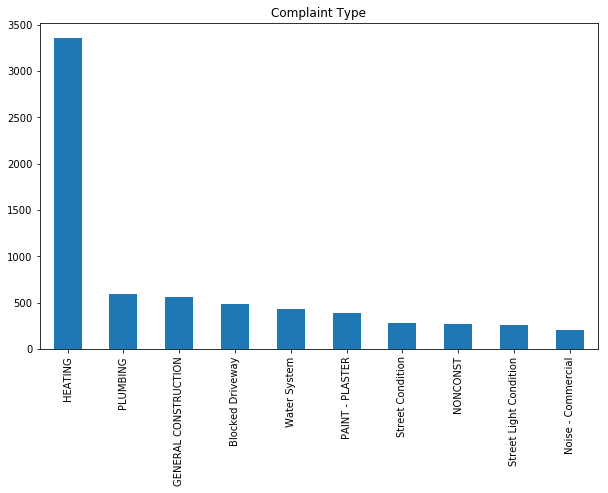

In [9]:
nyc_df['Complaint Type'].value_counts().nlargest(10).plot(kind='bar', title='Complaint Type',figsize=(10,6))
plt.show()

__Now we will find out  complaint according to city__

In [10]:
nyc_df.groupby(['Complaint Type'])['City'].value_counts()

Complaint Type               City               
APPLIANCE                    BRONX                   29
                             BROOKLYN                18
                             NEW YORK                16
                             JAMAICA                  2
                             WOODHAVEN                2
                             FOREST HILLS             1
                             JACKSON HEIGHTS          1
Air Quality                  NEW YORK                26
                             BROOKLYN                 7
                             ASTORIA                  1
                             BRONX                    1
                             CORONA                   1
                             SOUTH OZONE PARK         1
                             STATEN ISLAND            1
Animal Facility - No Permit  BROOKLYN                 1
Animal in a Park             BROOKLYN                 3
                             BRONX                    2

In [11]:
nyc_df.groupby(['Complaint Type'])['City'].value_counts().nlargest(10)

Complaint Type        City    
HEATING               BRONX       1204
                      BROOKLYN    1051
                      NEW YORK     696
PLUMBING              BROOKLYN     209
GENERAL CONSTRUCTION  BRONX        204
                      BROOKLYN     198
PLUMBING              BRONX        187
Blocked Driveway      BROOKLYN     172
PAINT - PLASTER       BRONX        154
                      BROOKLYN     139
Name: City, dtype: int64

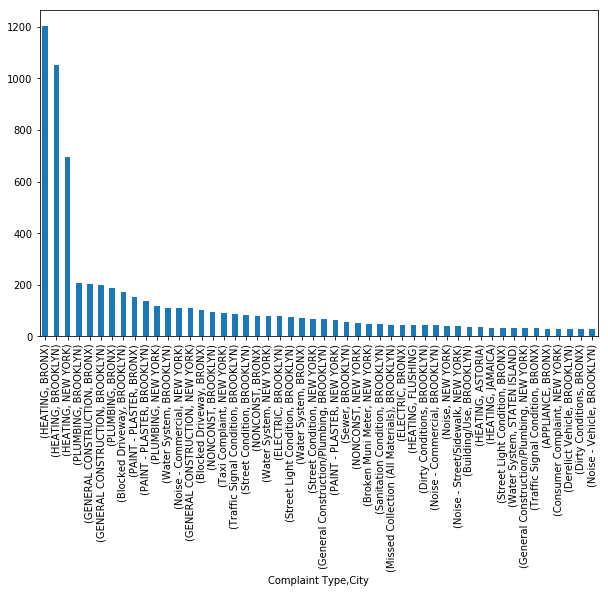

In [12]:
nyc_df.groupby(['Complaint Type'])['City'].value_counts().nlargest(50).plot(kind='bar', figsize=(10,6))
plt.show()

__Beacuse Heating is most frequent complaint type  so, we will Visualize that__

In [13]:
nyc_df.groupby(['Complaint Type']).get_group('HEATING')['City'].value_counts().nlargest(20)

BRONX                  1204
BROOKLYN               1051
NEW YORK                696
FLUSHING                 45
ASTORIA                  36
JAMAICA                  34
STATEN ISLAND            26
JACKSON HEIGHTS          25
WOODSIDE                 24
ELMHURST                 23
RIDGEWOOD                19
QUEENS VILLAGE           12
REGO PARK                11
SOUTH RICHMOND HILL      10
CORONA                   10
FOREST HILLS              9
FAR ROCKAWAY              9
RICHMOND HILL             8
EAST ELMHURST             8
HOLLIS                    8
Name: City, dtype: int64

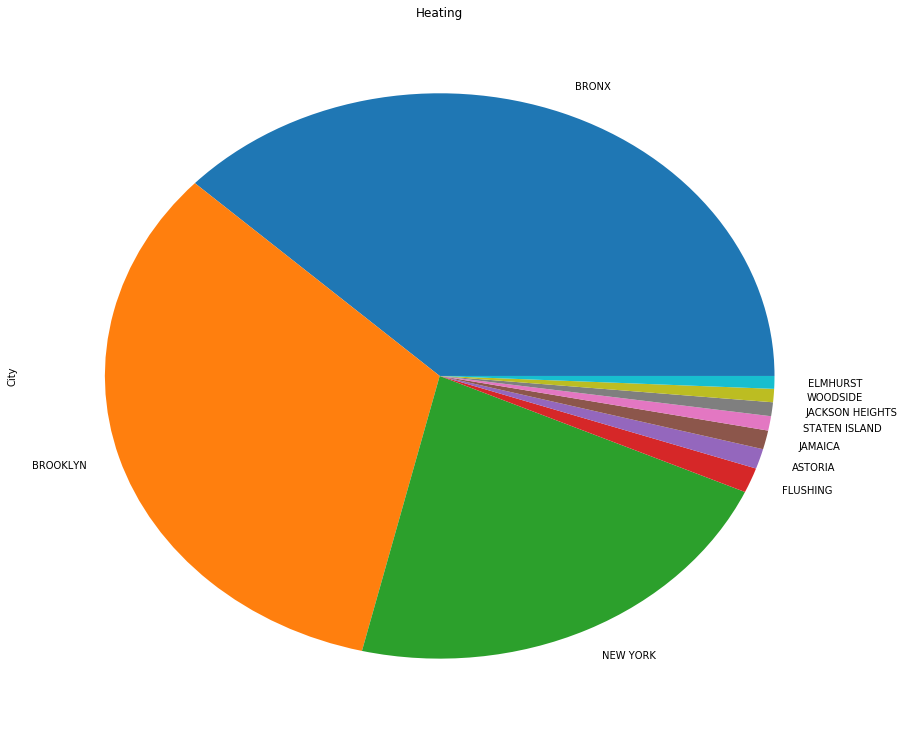

In [14]:
nyc_df.groupby(['Complaint Type']).get_group('HEATING')['City'].value_counts().nlargest(10).plot(kind='pie', title='Heating',figsize=(15,13))
plt.show()

__So, according to the above analysis heating is the highest registered complaint type and the maximum number of complaints registered from BRONX.__